In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador de datos con aumentación para el conjunto de entrenamiento
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generador de datos sin aumentación para el conjunto de validación
val_data_gen = ImageDataGenerator(rescale=1.0/255)

# Definir el directorio de datos y los parámetros de tamaño de imagen y lote
data_dir = '/content/drive/MyDrive/standforddogs/images'
img_size = (224, 224)
batch_size = 32

# Cargar el conjunto de datos de entrenamiento con aumentación
train_ds = train_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Para clasificación binaria
    shuffle=True,
    seed=123
)

# Cargar el conjunto de datos de validación sin aumentación
val_ds = val_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=123
)



Found 301 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador con aumentación de datos para el conjunto de entrenamiento
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generador de datos sin aumentación para el conjunto de validación
val_data_gen = ImageDataGenerator(rescale=1.0/255)

# Ruta al directorio de datos principal
data_dir = '/content/drive/MyDrive/standforddogs/images'
img_size = (224, 224)
batch_size = 32

# Cargar el conjunto de datos de entrenamiento con aumentación
train_ds = train_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Para clasificación binaria
    shuffle=True,
    seed=123
)

# Cargar el conjunto de datos de validación sin aumentación
val_ds = val_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)



Found 301 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


Para el primer modelo es un modelo secuencial que comienza con una capa Conv2D de 32 filtros, cada uno de tamaño 3x3, con activación ReLU y una entrada configurada para imágenes RGB con forma (224, 224, 3). Esta capa es seguida por una capa MaxPooling2D que reduce la dimensionalidad espacial al tomar el valor máximo en regiones 2x2. Se añade una capa Conv2D de 64 filtros con activación ReLU, seguida de una capa MaxPooling2D y una tercera capa Conv2D de 128 filtros con activación ReLU, también seguida por una capa MaxPooling2D. Después, una capa Flatten onvierte los mapas de características en un vector plano, que se pasa a una capa densa de 512 neuronas con activación ReLU. Finalmente, una capa de salida con una única neurona y activación sigmoide genera la probabilidad para la clasificación binaria. Como podemos ver en el summary, tenemos 44,396,609 parámetros entrenambles.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Cambié el canal a 3 para imágenes RGB
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Aplanar antes de pasar a las capas densas
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Cambié a softmax y a 5 unidades para 5 clases
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

epochs = 25

history = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.5645 - loss: 1.8712 - val_accuracy: 0.5017 - val_loss: 0.7644
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.5288 - loss: 0.7097 - val_accuracy: 0.6478 - val_loss: 0.6261
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.6642 - loss: 0.6233 - val_accuracy: 0.7143 - val_loss: 0.5697
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.7073 - loss: 0.5711 - val_accuracy: 0.8140 - val_loss: 0.5355
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.8013 - loss: 0.5427 - val_accuracy: 0.8206 - val_loss: 0.4058
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 7s/step - accuracy: 0.7372 - loss: 0.5563 - val_accuracy: 0.7741 - val_loss: 0.5001
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 7s/step - accuracy: 0.7920 - loss: 0.4888 - val_accuracy: 0.8372 - val_loss: 0.4027
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.7836 - loss: 0.4867 - val_accuracy: 0.8239 - val_loss: 0.4207
Epo

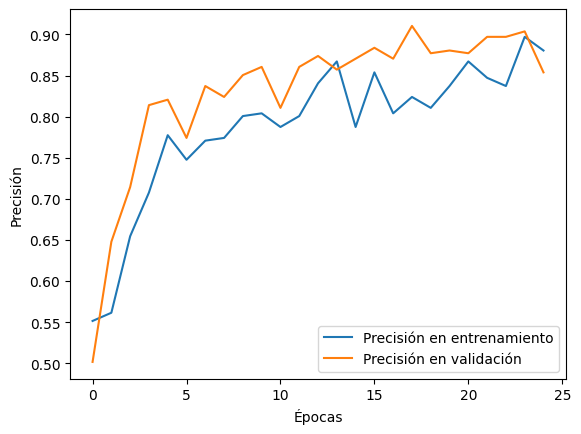

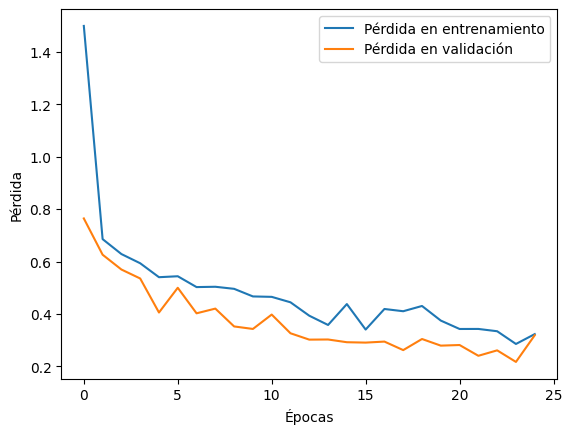

In [6]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


La precisión en entrenamiento muestra un crecimiento constante durante las primeras 10 épocas, alcanzando un punto de estabilidad cercana al 90% hacia el final del entrenamiento, en validación sigue una tendencia similar, logrando incluso un rendimiento ligeramente superior al del conjunto de entrenamiento en algunos momentos, lo cual podría indicar que el modelo está generalizando bien y no se muestra un overfitting claro. La pérdida en entrenamiento decrece significativamente durante las primeras épocas, mostrando una tendencia a estabilizarse alrededor de 0.3 al final del entrenamiento,en validación también decrece de manera similar y se mantiene consistentemente más baja que la pérdida en entrenamiento en casi todas las épocas por lo tanto el modelo generaliza bien.

In [14]:
from tensorflow.keras import regularizers

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.7),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,244,929 (84.86 MB)

 Trainable params: 22,244,929 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Ahora las tres capas convolucionales invluyen regularización L2 para penalizar los pesos excesivamente grandes y nos ayudas con el overfitting. Las capas utilizan 32, 64 y 128 filtros, respectivamente, con tamaño de 3x3 y activación ReLU, manteniendo una arquitectura escalable para captar características de diferentes niveles. Al igual que en el modelo anterior, se incluye una capa Flatten que convierte los mapas de características en un vector plano. Sin embargo, la capa densa cuenta ahora con 256 neuronas y también utiliza regularización L2. Además, se incorpora una capa Dropout con una tasa de 0.7, lo que permite desactivar un 70% de las neuronas durante el entrenamiento. La capa de salida es la misma.

Se aumentaron las épocas y se implementó EarlyStoping, esto para evitar un entrenamiento innecesario. El optimizador Adam tiene un learning rate de 0.0001 para una actualizaion de los pesos eficiente y controlada, compilamos el modelo con la función de pérdida binary cross-entropy ya que es clasificación binaria.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Definir EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitorea la pérdida en validación
    patience=5,              # Número de épocas sin mejora para detener el entrenamiento
    restore_best_weights=True  # Restaura los pesos del modelo con el mejor val_loss
)

# Compilar el modelo
model2.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajuste correcto del optimizador
    loss='binary_crossentropy',            # Para clasificación binaria
    metrics=['accuracy']
)

# Entrenar el modelo con EarlyStopping
epochs = 60  # Ajusta el número de épocas según tus necesidades

history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]  # Añadir el callback de early stopping
)


Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.4775 - loss: 1.3346 - val_accuracy: 0.5017 - val_loss: 1.2485
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.5011 - loss: 1.2547 - val_accuracy: 0.6113 - val_loss: 1.1507
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.6036 - loss: 1.1511 - val_accuracy: 0.7475 - val_loss: 1.0623
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.7500 - loss: 1.0491 - val_accuracy: 0.7508 - val_loss: 0.9672
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.7158 - loss: 0.9763 - val_accuracy: 0.7143 - val_loss: 0.9292
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.6944 - loss: 0.9700 - val_accuracy: 0.7807 - val_loss: 0.8481
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.7357 - loss: 0.9110 - val_accuracy: 0.7874 - val_loss: 0.8068
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.7149 - loss: 0.8378 - val_accuracy: 0.7940 - val_loss:

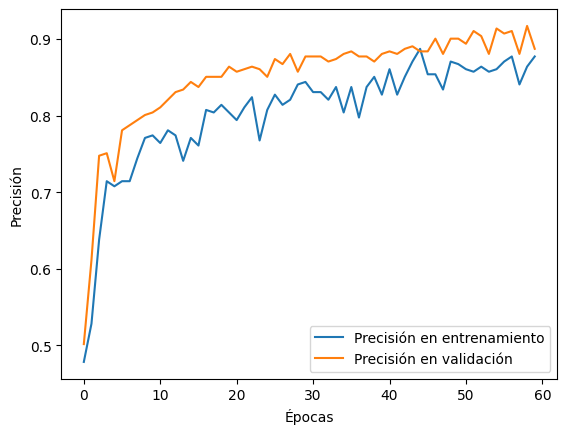

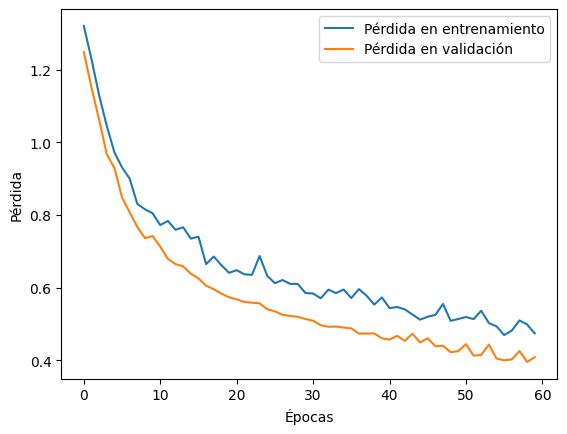

In [12]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

En la precisión podemos observar un incremento constante en las primeras épocas, pero hacia el final del entrenamiento se observa que el acuracy del conjunto de validación es mayor que en el entramiento, por lo tanto se esta generalizando bien el modelo a los datos de validación, pero de igual forma puede que el modelo este experimetnado alguna variabilidad en el aprendizaje. La pérdida disminuye rapidamente al incio, por lo que el modelo aprende de manera efectiva en este momento, después, la pérdida si continua disminuyendo pero a un ritmo más lento, también podemos observar que el modelo no esta haciendo overfitting, esto gracias a las técnicas de regularización L2 y dropout.

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Ruta de la imagen que deseas cargar
image_path = '/content/drive/MyDrive/standforddogs/prueba/IMG_1885.jpg'

# Cargar y preprocesar la imagen
img = Image.open(image_path)
img = img.resize((224, 224))  # Redimensionar la imagen al tamaño de entrada
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el lote

# Hacer la predicción
prediction = model2.predict(img_array)

# Interpretar la predicción
if prediction[0] > 0.5:
    print("La imagen es de la raza sussex spaniel")
else:
    print("La imagen es de la raza doberman")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
La imagen es de la raza doberman


A pesar de que el modelo 1 parecía tener una mayor presición, al momneto de comparar entre entrenamiento y validación se podía llegar a ver que podría sobre ajustarse un poco, por eso decidí utilizar el modelo 2 ya que los valores de accuracy eran mas similares, lo que da un poco mas de confianza en el modelo, y como podemos observar el modelo 2 clasifico correctamente la imagen proporcionada.